In [19]:
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np

In [20]:
#Stock symbols whick make up our portfolio
stocks = ['ADYEN.AS','ALV.DE','BNP.PA', 'DAI.DE', 'ENEL.MI', 'FLTR.IR', 'FP.PA', 'LIN', 'OR.PA', 'VNA.DE']

In [21]:
#Download the price data for the stocks
price_data = web.get_data_yahoo(stocks,
                               start = '2020-01-01',
                               end = '2020-12-31')

In [22]:
#We just need the Adjusted Closing price for our returns calculations so we just select those columns. 
price_data = price_data['Adj Close']
print(price_data.head())

Symbols       ADYEN.AS      ALV.DE     BNP.PA     DAI.DE   ENEL.MI  \
Date                                                                 
2020-01-02  743.599976  208.326904  47.726330  46.210567  6.785092   
2020-01-03  741.799988  206.022614  47.156246  45.373741  6.784151   
2020-01-06  736.200012  204.752899  46.924652  45.128704  6.798264   
2020-01-07  741.000000  205.223160  46.906837  45.489326  6.802027   
2020-01-08  741.000000  205.317215  47.013725  45.743614  6.839659   

Symbols        FLTR.IR      FP.PA         LIN       OR.PA     VNA.DE  
Date                                                                  
2020-01-02  107.360985  44.513588  206.324966  256.270172  45.499195  
2020-01-03  107.699821  45.018463  200.959763  255.979187  45.668335  
2020-01-06  106.828545  45.670380  200.108002  255.106216  45.527386  
2020-01-07  107.554611  45.371586  200.538803  251.808243  45.771702  
2020-01-08  107.554611  45.489292  203.045151  253.360245  46.016018  


In [23]:
#We need to align our weights correctly to the column names
w = [0.12317876405494811,0.28667871883283164,0.021610937207444236,0.2616093816418073,0.021834018457887277,0.018157809202825847,0.018286718214128698,0.03542548627443902,0.20539879819028325,0.007819367743054995]

In [24]:
#We will calculate the returns in our portfolio
ret_data = price_data.pct_change()[1:]
print(ret_data.head())

Symbols     ADYEN.AS    ALV.DE    BNP.PA    DAI.DE   ENEL.MI   FLTR.IR  \
Date                                                                     
2020-01-03 -0.002421 -0.011061 -0.011945 -0.018109 -0.000139  0.003156   
2020-01-06 -0.007549 -0.006163 -0.004911 -0.005400  0.002080 -0.008090   
2020-01-07  0.006520  0.002297 -0.000380  0.007991  0.000554  0.006797   
2020-01-08  0.000000  0.000458  0.002279  0.005590  0.005532  0.000000   
2020-01-09  0.007827  0.010994 -0.007200  0.004245  0.004814 -0.009001   

Symbols        FP.PA       LIN     OR.PA    VNA.DE  
Date                                                
2020-01-03  0.011342 -0.026004 -0.001135  0.003717  
2020-01-06  0.014481 -0.004238 -0.003410 -0.003086  
2020-01-07 -0.006542  0.002153 -0.012928  0.005366  
2020-01-08  0.002594  0.012498  0.006163  0.005338  
2020-01-09 -0.005573  0.007040  0.006125  0.002655  


In [25]:
#Next we can calculate the weighted returns 
weighted_returns = (w * ret_data)
print(weighted_returns.head())

Symbols     ADYEN.AS    ALV.DE    BNP.PA    DAI.DE   ENEL.MI   FLTR.IR  \
Date                                                                     
2020-01-03 -0.000298 -0.003171 -0.000258 -0.004737 -0.000003  0.000057   
2020-01-06 -0.000930 -0.001767 -0.000106 -0.001413  0.000045 -0.000147   
2020-01-07  0.000803  0.000658 -0.000008  0.002091  0.000012  0.000123   
2020-01-08  0.000000  0.000131  0.000049  0.001462  0.000121  0.000000   
2020-01-09  0.000964  0.003152 -0.000156  0.001110  0.000105 -0.000163   

Symbols        FP.PA       LIN     OR.PA    VNA.DE  
Date                                                
2020-01-03  0.000207 -0.000921 -0.000233  0.000029  
2020-01-06  0.000265 -0.000150 -0.000700 -0.000024  
2020-01-07 -0.000120  0.000076 -0.002655  0.000042  
2020-01-08  0.000047  0.000443  0.001266  0.000042  
2020-01-09 -0.000102  0.000249  0.001258  0.000021  


Text(0.5, 0, 'Date')

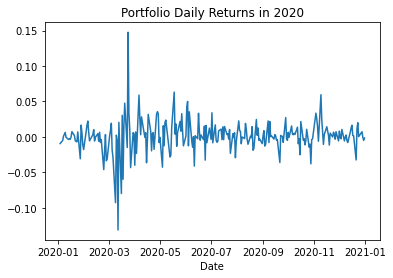

In [26]:
#We plot the daily returns of the portfolio in 2020
port_ret = weighted_returns.sum(axis=1)
plt.plot(port_ret)
plt.title('Portfolio Daily Returns in 2020')
plt.xlabel('Date')

In [27]:
#we will calculate the portfolio mean and standard deviation
mean_ret = port_ret.mean()
std_returns = port_ret.std()
print(mean_ret)

0.0012356407848690876


In [28]:
print(std_returns)

0.022873990509541062


In [29]:
#the index we are tracking
index = ['^STOXX50E']

In [30]:
#Download the price data for the stocks
price_index_data = web.get_data_yahoo(index,
                               start = '2020-01-01',
                               end = '2020-12-31')

In [31]:
price_index_data = price_index_data['Adj Close']
print(price_index_data.head())

Symbols       ^STOXX50E
Date                   
2020-01-03  3773.370117
2020-01-06  3752.520020
2020-01-07  3759.250000
2020-01-08  3772.560059
2020-01-09  3795.879883


In [32]:
ret_index_data = price_index_data.pct_change()[1:]
print(ret_index_data.head())

Symbols     ^STOXX50E
Date                 
2020-01-06  -0.005526
2020-01-07   0.001793
2020-01-08   0.003541
2020-01-09   0.006181
2020-01-10  -0.001675


Text(0.5, 0, 'Date')

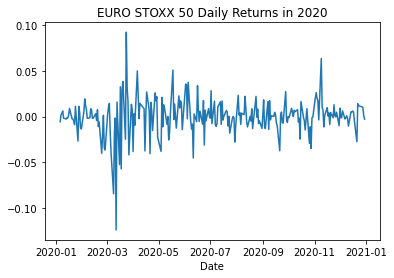

In [33]:
#We plot the daily returns of the portfolio in 2020
index_ret = ret_index_data.sum(axis=1)
plt.plot(index_ret)
plt.title('EURO STOXX 50 Daily Returns in 2020')
plt.xlabel('Date')

In [34]:
#we will calculate the index mean and standard deviation
mean_index_ret = index_ret.mean()
std_returns_index = index_ret.std()
print(mean_index_ret)

-9.260758176262675e-06


In [35]:
print(std_returns_index)

0.02037506964705898


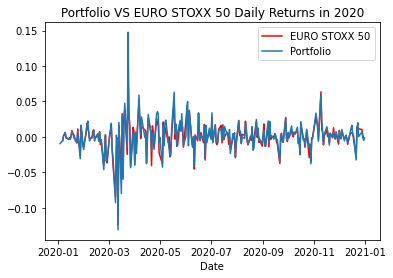

In [36]:
#We combine the plots in a single graph
plt.plot(index_ret, color = 'red', label = 'EURO STOXX 50')
plt.plot(port_ret, label = 'Portfolio')
plt.title('Portfolio VS EURO STOXX 50 Daily Returns in 2020')
plt.xlabel('Date')
plt.legend(loc='best')

On average it appears that our portfolio closely follows trends in EURO STOXX 50 which means our portfolio can be considered a good representation of the entire index.
